In [79]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from dataset_path import output_path

path = output_path
output_path = os.path.join(path, "Figure3")

## Importing Datasets

In [80]:
# read data

df_test = pd.read_csv((os.path.join(path, 'test.csv')))
df_test_pred = pd.DataFrame(np.load('results/pred_base.npy', allow_pickle=True), columns=['pred'])

In [81]:
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100) 
df_test.head(5)

,stay_id,subject_id,hadm_id,intime,outtime,gender,race,arrival_transport,disposition,anchor_age,anchor_year,dod,admittime,dischtime,deathtime,ethnicity,edregtime,edouttime,insurance,in_year,age,outcome_inhospital_mortality,ed_los,intime_icu,time_to_icu_transfer,outcome_icu_transfer_12h,outcome_hospitalization,outcome_critical,n_ed_30d,n_ed_90d,n_ed_365d,next_ed_visit_time,next_ed_visit_time_diff,outcome_ed_revisit_3d,n_hosp_30d,n_hosp_90d,n_hosp_365d,n_icu_30d,n_icu_90d,n_icu_365d,ed_los_hours,time_to_icu_transfer_hours,next_ed_visit_time_diff_days,triage_temperature,triage_heartrate,triage_resprate,triage_o2sat,triage_sbp,triage_dbp,triage_pain,...,ed_temperature_last,ed_heartrate_last,ed_resprate_last,ed_o2sat_last,ed_sbp_last,ed_dbp_last,ed_pain_last,n_med,n_medrecon,cxr_notes,cxr,triage_MAP,score_CCI,score_CART,score_REMS,score_NEWS,score_NEWS2,score_MEWS,med_Vitamins,med_Antidepressant,med_Antihyperlipidemic,med_Laxative,med_Anticonvulsant,med_Platelet Aggregation Inhibitors,med_Gastric Acid Secretion Reducing Agents,med_Salicylate Analgesics,med_Diuretic,med_Asthma/COPD Therapy,med_Minerals and Electrolytes,med_Dermatological,med_Antianxiety Agent,med_Beta Blockers Cardiac Selective,med_Benzodiazepines,med_Analgesic Opioid Agonists,med_Antihistamines,med_ACE Inhibitors,med_Calcium Channel Blockers,med_Analgesic or Antipyretic Non,"med_Medical Supply, FDB Superset",med_Medical Supplies and DME,med_Insulin Analogs,med_Multivitamins,med_Thyroid Hormones,med_Antipsychotic,med_Bipolar Therapy Agents,med_Antiemetic,med_Insulin Response Enhancers,med_NSAID Analgesics (COX Non,med_Ophthalmic,med_Others
0,32952584,10000032,29079034.0,2180-07-22 16:24:00,2180-07-23 05:54:00,F,WHITE,AMBULANCE,HOME,52,2180,2180-09-09,2180-07-23 12:35:00,2180-07-25 17:55:00,NaN,WHITE,2180-07-23 05:54:00,2180-07-23 14:00:00,Medicaid,2180,52,False,0 days 13:30:00,2180-07-23 14:00:00,0 days 08:06:00,True,True,True,1,2,2,2180-07-23 05:54:00,0 days 00:00:00,True,1,2,2,0,0,0,13.50,8.1,0.00,36.555556,87.0,14.0,97.0,71.0,43.0,7.0,...,36.777778,85.0,18.0,98.0,81.0,38.0,0.0,2.0,14.0,NaN,0,52.333333,6,4,4,3,3,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,36954971,10000084,29888819.0,2160-12-27 18:32:00,2160-12-28 16:07:00,M,WHITE,AMBULANCE,HOME,72,2160,2161-02-13,2160-12-28 05:11:00,2160-12-28 16:07:00,NaN,WHITE,2160-12-27 18:32:00,2160-12-28 16:07:00,Medicare,2160,72,False,0 days 21:35:00,NaN,NaN,False,True,False,0,1,1,NaN,NaN,False,0,1,1,0,0,0,21.58,NaN,NaN,37.055556,80.0,16.0,95.0,111.0,72.0,0.0,...,37.055556,80.0,16.0,100.0,119.0,84.0,0.0,1.0,6.0,NaN,0,85.000000,4,9,5,1,0,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,38081480,10000115,NaN,2154-12-10 02:04:00,2154-12-10 05:59:00,M,WHITE,WALK IN,HOME,24,2154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2154,24,False,0 days 03:55:00,NaN,NaN,False,False,False,0,0,0,2154-12-17 16:37:00,7 days 10:38:00,False,0,0,0,0,0,0,3.92,NaN,7.44,36.444444,81.0,18.0,99.0,120.0,71.0,5.0,...,36.666667,78.0,16.0,99.0,116.0,70.0,0.0,0.0,0.0,NaN,0,87.333333,0,0,0,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,32642808,10000117,22927623.0,2181-11-14 21:51:00,2181-11-15 02:06:42,F,WHITE,WALK IN,ADMITTED,48,2174,NaN,2181-11-15 02:05:00,2181-11-15 14:52:00,NaN,WHITE,2181-11-14 21:51:00,2181-11-15 09:57:00,Other,2181,55,False,0 days 04:15:42,NaN,NaN,False,True,False,0,0,0,2183-07-17 10:30:00,609 days 08:23:18,False,0,0,0,0,0,0,4.26,NaN,609.35,36.444444,81.0,16.0,100.0,148.0,83.0,0.0,...,37.000000,85.0,21.0,98.0,141.0,77.0,0.0,0.0,1.0,NaN,0,104.666667,1,4,3,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,30632130,10000117,NaN,2183-07-17 10:30:00,2183-07-17 11:31:00,F,WHITE,WALK IN,HOME,48,2174,NaN,NaN,NaN,N

In [82]:
# Concatenate both datasets

df = pd.concat([df_test, df_test_pred], axis = 1)
df = df[['stay_id','subject_id','gender','race','arrival_transport', 'disposition',
         'ethnicity','insurance',"outcome_hospitalization",'pred']]

In [83]:
df

,stay_id,subject_id,gender,race,arrival_transport,disposition,ethnicity,insurance,outcome_hospitalization,pred
0,32952584,10000032,F,WHITE,AMBULANCE,HOME,WHITE,Medicaid,True,0.900357
1,36954971,10000084,M,WHITE,AMBULANCE,HOME,WHITE,Medicare,True,0.743215
2,38081480,10000115,M,WHITE,WALK IN,HOME,NaN,NaN,False,0.109680
3,32642808,10000117,F,WHITE,WALK IN,ADMITTED,WHITE,Other,True,0.200302
4,30632130,10000117,F,WHITE,WALK IN,HOME,WHITE,NaN,False,0.524906
...,...,...,...,...,...,...,...,...,...,...
83615,38635871,19999018,F,MULTIPLE RACE/ETHNICITY,WALK IN,HOME,NaN,NaN,False,0.251739
83616,36370988,19999043,F,WHITE,AMBULANCE,HOME,WHITE,NaN,False,0.388915
83617,39012698,19999156,F,WHITE,WALK IN,HOME,WHITE,Other,True,0.485026
83618,34469189,19999175,M,WHITE,WALK IN,HOME,NaN,NaN,False,0.081430


## Evaluate Fairness

In [84]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


In [85]:
# optimal threshold from other notebooks

threshold = 0.45666417

pred_outcome = df.pred > threshold
df['pred_outcome'] = pred_outcome

In [86]:
race_single = df.race.apply(lambda x: x.split(' ')[0])

In [87]:
# merge race

race_single[race_single == 'BLACK/CAPE'] = 'BLACK/AFRICAN'
race_single[race_single == 'BLACK/CARIBBEAN'] = 'BLACK/AFRICAN'

race_single[race_single == 'HISPANIC'] = 'HISPANIC/LATINO'
race_single[race_single == 'SOUTH'] = 'HISPANIC/LATINO'

race_single[race_single == 'AMERICAN'] = 'NATIVE'

race_single[race_single == 'PORTUGUESE'] = 'WHITE'

In [88]:
df['race_single'] = race_single

In [89]:
len(df)

83620

In [90]:
race_single.value_counts()

WHITE              48786
BLACK/AFRICAN      18567
HISPANIC/LATINO     7001
OTHER               3989
ASIAN               3711
UNKNOWN             1046
NATIVE               312
PATIENT              126
MULTIPLE              60
UNABLE                22
Name: race, dtype: int64

In [91]:
black = df[df['race_single'] == 'BLACK/AFRICAN']
white = df[df['race_single'] == 'WHITE']
hispanic = df[df['race_single'] == 'HISPANIC/LATINO']
asian = df[df['race_single'] == 'ASIAN']

In [92]:
print(roc_auc_score(black['outcome_hospitalization'], black['pred']))
print(roc_auc_score(white['outcome_hospitalization'], white['pred']))
print(roc_auc_score(hispanic['outcome_hospitalization'], hispanic['pred']))
print(roc_auc_score(asian['outcome_hospitalization'], asian['pred']))
print(roc_auc_score(df['outcome_hospitalization'], df['pred']))

0.8259608359758419
0.8109376768985681
0.8207697412904342
0.8342381119609166
0.8248720914725415


In [93]:
def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    y_actual = list(y_actual)
    y_hat = list(y_hat)

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1

    return(TP, FP, TN, FN)

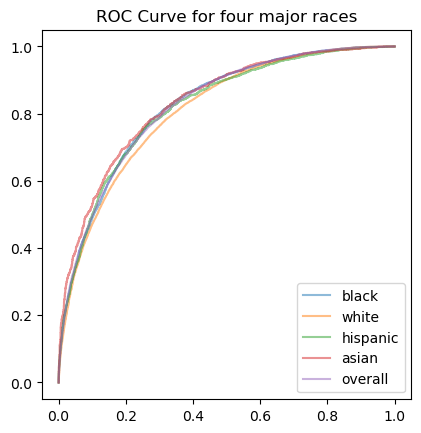

In [94]:
# calculate metrics

races = [black, white, hispanic, asian, df]
fpr = []
fnr = []
selection_rate = []

for race in races:

    race_name = race.race_single.iloc[0]
    a,b, _ = roc_curve(race['outcome_hospitalization'], race['pred'])
    plt.plot(a, b, alpha = 0.5)

    (TP, FP, TN, FN) = perf_measure(race['outcome_hospitalization'], race['pred_outcome'])

    fpr.append(FP/(FP+TN))
    fnr.append(FN/(TP+FN))
    selection_rate.append(np.mean(race['pred_outcome']))

plt.axis('square')
plt.title('ROC Curve for four major races')
plt.legend(['black','white','hispanic','asian', 'overall'])
plt.show()

In [95]:
print(fpr)
print(fnr)
print(selection_rate)

[0.22246852278772833, 0.3192620250384362, 0.18502105029913582, 0.2111587982832618, 0.2645303315707056]
[0.28494992454383317, 0.21709388570769764, 0.3384244372990354, 0.2838522809558291, 0.24235912733523776]
[0.4158453169601982, 0.5665559791743533, 0.35437794600771316, 0.3990838049043385, 0.4977995694809854]
